In [12]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from cv2 import __version__
print(__version__)

eye_dir = './images/'
eye_list = []
eye_rect_list = []
eye_segment_list = []
for _ in os.listdir(eye_dir):
    if ".jpg" in _:
        fname=eye_dir+_
        eye_list.append(fname)

#Source face: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
#Source eye: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
face_cascade = cv2.CascadeClassifier(eye_dir+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(eye_dir+'haarcascade_eye.xml')


3.2.0


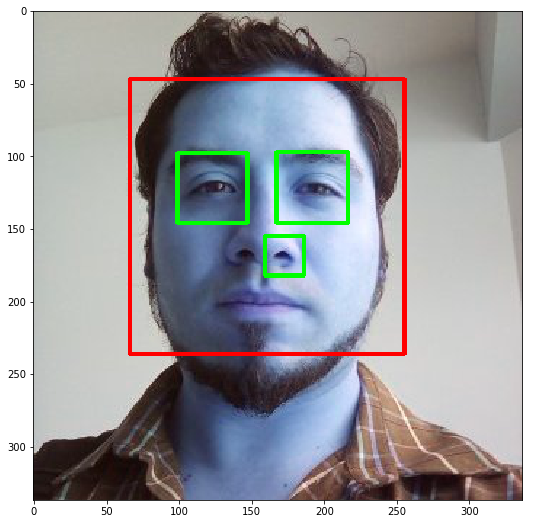

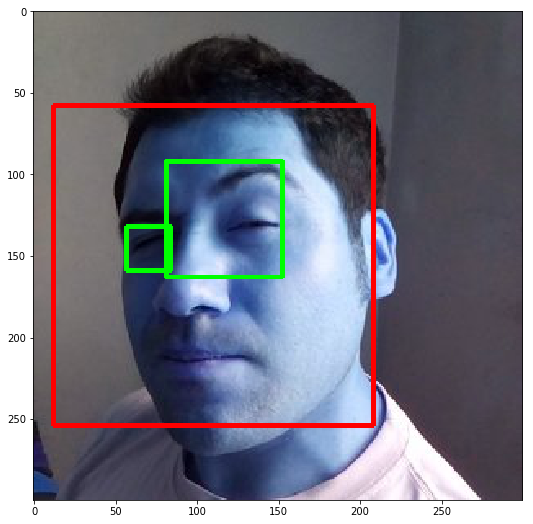

In [11]:
for imgx in range(0,min(20,len(eye_list))):
    img = cv2.imread(eye_list[imgx])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    fig = plt.figure(figsize=(12,9))
    plt.imshow(img)
    plt.show()

In [ ]:
eyes = eye_cascade.detectMultiScale(gray)
    for (ex,ey,w,h) in eyes:
        print(ex,ey,w,h)
        top_left= (ex,ey)
        bottom_right= (ex+w,ey+h)
        cv2.rectangle(img,top_left,bottom_right,color=[0,255,0],thickness=2)#(ex+ew,ey+eh)